# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# P1:  Pure Python만을 이용하여 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanilla" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Perceptron 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) Perceptron Model 구현 **<구현>**
    - 4) Perceptron Model 학습
    - 5) Perceptron Model 검증
    - 6) Decision Boundary 시각화

<br>

- S2. Discussion **<작성>**

### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  Perceptron 구현 및 분석

## 1-1) Imports
**! 수정하지 마세요.** pure python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1-2) Loading the Dataset
**! 수정하지 마세요.** 

코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

두 개의 class(0, 1)를 갖는 2차원 데이터이며, class 0은 -1의 값을 가지고 class 1은 1의 값을 가집니다.

In [31]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    classes = [-1, 1]
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(classes[int(values[-1])])
print(len(X), len(y))
print(y)

100 100
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dataset Split & Visualization

**! 수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [32]:
import random

# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

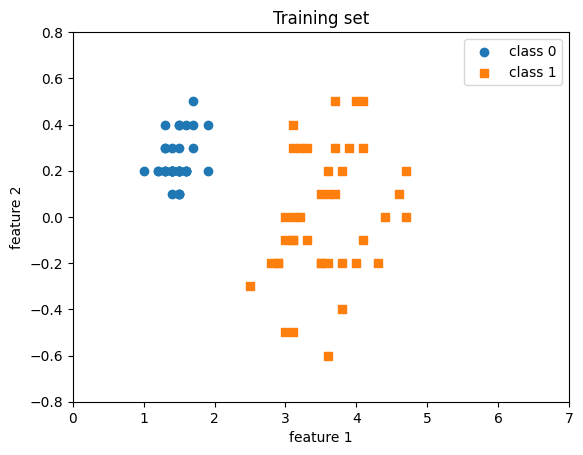

In [33]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 1-3) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위한 gradient를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다. **(주의: Accuracy 계산)**

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation function은 입력값을 기준으로 `0 초과는 1, 0 이하는 -1`을 출력하게 한다.
- 주의: <U>**Cost Function은 MSE 또는 Cross-Entropy가 아닌 $J(w) = -y(w^Tx)$를 사용**</U>한다. , $x\in Y$는 **틀린 샘플의 집합** 

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [39]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [random.random() for i in range(num_features)]# <your code> initialization
        self.bias = float(0) # <your code> initialization
        self.lr = 0.01
    
    # 모델의 출력을 반환하는 함수
    def forward(self, x):
        linear = 0
        for i in range(len(x)):
            linear += self.weights[i] * x[i] # <your code> compute weighted sum
        prediction = linear + self.bias # <your code> apply activation 
        return prediction
        
    # 손실함수에 기반하여 모델의 가중치를 업데이트하기 위한 gradient를 반환하는 함수
    def backward(self, x, y):
        #0 초과는 1 0 이하는 -1 출력
        gradient = -self.forward(x) * y # <your code> to compute the gradient
        if(gradient > 0):
            return 1
        else:
            return -1
        #return gradient
        
    def train(self, x, y, epochs):
        # epochs 만큼 학습
        for e in range(epochs):
            # Each data point (Stochastic learning)
            for i in range(len(y)):
                x_, y_ = x[i], y[i]
                # 오분류 샘플에 대해서만 gradient를 계산하여 모델의 가중치를 업데이트 함
                if y_ != self.forward(x_):
                    for j in range(len(x_)):
                        gradient = self.lr* self.backward(x_, y_) # <your code> to compute the gradient
                        
                        # <your code> to update the weights
                        self.weights[j] += gradient
                    self.bias -= -y_ * self.lr
               
    def evaluate(self, x, y):
        # <your code> to compute the prediction accuracy  
        # 여기서 x, y는 10개짜리 list임 
        accuracy = 0
        # 아마도 y가 공집합인 리스트의 갯수?
     
        return accuracy

## 1-4) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 10 epoch 학습하고 학습된 weight, bias를 print합니다.

In [40]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 10)    # 10 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[0.42999070972424547, 0.03337318408615953]
0.20000000000000004


## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [41]:
# Train dataset에서 성능 평가
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 0.00%


In [42]:
# Test dataset에서 성능 평가
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 0.00%


## 1-6) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

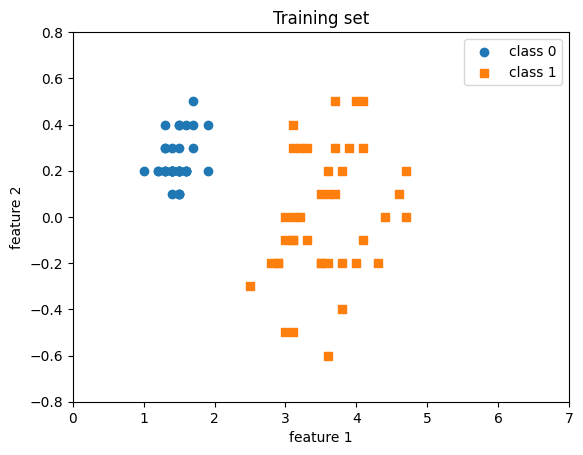

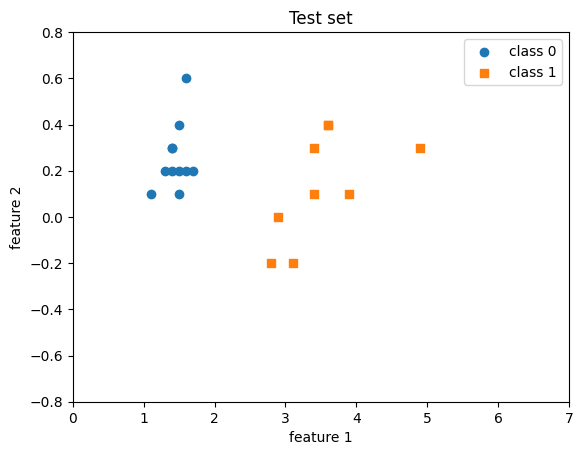

In [43]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## S2. Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]

**2) Perceptron 하나로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]

---